In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from scipy import stats
from scipy.stats import entropy
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
eps = 2e-10

In [2]:
def lorenz(x, y, z, s=10, r=28, b=2.667):
    x_dot = s*(y - x)
    y_dot = r*x - y - x*z
    z_dot = x*y - b*z
    return x_dot, y_dot, z_dot

In [3]:
## Hurst Exponent:
def hurst(X):
    m = np.mean(X)
    Y = X - m
    Z = np.cumsum(Y)
    RS = np.zeros(len(Z))
    RS = np.array([])
    count = 1
    for i in range(len(Z)):
        R = np.max(Z[:i+1])-np.min(Z[:i+1])
        S = np.sqrt(np.mean( np.abs(X[:i+1]-np.mean(X[:i+1])) ))
        if not S == 0 and not R == 0:
            RS = np.append(RS , R/S)
            count += 1
    slope, intercept, r, p, std_err = stats.linregress(np.log10(np.arange(1,count)), np.log10(RS))
    return slope

In [4]:
## Disequilbruim:
def disequil(x,bins):
    freq , sub_sets = np.histogram(xs , bins = bins)
    pk = freq / len(xs)
    D = np.sum(np.abs(pk-1/len(pk))**2)
    return D

In [5]:
## Entropy:
def data_entropy(x,bins):
    freq , sub_sets = np.histogram(xs , bins = bins)
    pk = freq / len(xs)
    return entropy(pk)

In [6]:
## Complexity
def complexity(x,bins):
    freq , sub_sets = np.histogram(xs , bins = bins)
    pk = freq / len(xs)
    D = np.sum(np.abs(pk-1/len(pk))**2)
    return entropy(pk)*D

In [7]:
#Initial Values
sample_rate = 1000 #Hz
timevec = np.arange(0,10,1/sample_rate)
dt = 1/sample_rate
num_steps = len(timevec)
s=10
r=28
b=2.667

In [15]:
start_1 = time.time()

Monte_carlo = 20
r_Q = np.array([])
for i in range(Monte_carlo):
    r_Q = np.append(r_Q , np.arange(0.1,40,0.1))
    
hopf_inequality = s*( ( s+b+3 )/( s-b-1 ) )



#X-Axis:
r_list_x = np.zeros(len(r_Q))
hurst_list_x = np.zeros(len(r_Q))
disequil_list_x = np.zeros(len(r_Q))
data_entropy_list_x = np.zeros(len(r_Q))
complexity_list_x = np.zeros(len(r_Q))
xs_zero_list = np.zeros(len(r_Q))
equilibrium_point_list_x = np.zeros(len(r_Q))
pitchfork_bifurcation_list_x = np.zeros(len(r_Q))
hopf_list_x = np.zeros(len(r_Q))

#Y-Axis:
r_list_y = np.zeros(len(r_Q))
hurst_list_y = np.zeros(len(r_Q))
disequil_list_y = np.zeros(len(r_Q))
data_entropy_list_y = np.zeros(len(r_Q))
complexity_list_y = np.zeros(len(r_Q))
ys_zero_list = np.zeros(len(r_Q))
equilibrium_point_list_y = np.zeros(len(r_Q))
pitchfork_bifurcation_list_y = np.zeros(len(r_Q))
hopf_list_y = np.zeros(len(r_Q))

#Z-Axis:
r_list_z = np.zeros(len(r_Q))
hurst_list_z = np.zeros(len(r_Q))
disequil_list_z = np.zeros(len(r_Q))
data_entropy_list_z = np.zeros(len(r_Q))
complexity_list_z = np.zeros(len(r_Q))
zs_zero_list = np.zeros(len(r_Q))
equilibrium_point_list_z = np.zeros(len(r_Q))
pitchfork_bifurcation_list_z = np.zeros(len(r_Q))
hopf_list_z = np.zeros(len(r_Q))




count_r = 0 
ind = 0 
for r_user in r_Q:
    count_r +=1
    start_2 = time.time()
    print('Iteration {0} from {1} , started at: {2}'.format(count_r , len(r_Q) , np.abs(start_2 - start_1) ))
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)
    zs = np.empty(num_steps)
    xs[0], ys[0], zs[0] = np.random.randn(3)
        
    for i in range(num_steps-1):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i] , r = r_user)
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
        
    #################################################### X-Axis #####################################
    hurst_list_x[ind] = hurst(xs)
    r_list_x[ind] =  r_user
    disequil_list_x[ind] =   disequil(xs,10)
    data_entropy_list_x[ind] =  data_entropy(xs,10)
    complexity_list_x[ind] =  complexity(xs,10)
    xs_zero_list[ind] =  xs[0]
        
    if r_user < 1 :
        equilibrium_point_list_x[ind] = 1
    else:
        equilibrium_point_list_x[ind] = 0
            
    if r_user > 1 and r_user < hopf_inequality :
        pitchfork_bifurcation_list_x[ind] = 1
    else:
        pitchfork_bifurcation_list_x[ind] = 0
            
    if r_user > hopf_inequality :
        hopf_list_x[ind] = 1
    else:
        hopf_list_x[ind] = 0
        
    #################################################### Y-Axis #####################################
    hurst_list_y[ind] = hurst(ys)
    r_list_y[ind] =  r_user
    disequil_list_y[ind] =   disequil(ys,10)
    data_entropy_list_y[ind] =  data_entropy(ys,10)
    complexity_list_y[ind] =  complexity(ys,10)
    ys_zero_list[ind] =  ys[0]
        
    if r_user < 1 :
        equilibrium_point_list_y[ind] = 1
    else:
        equilibrium_point_list_y[ind] = 0
            
    if r_user > 1 and r_user < hopf_inequality :
        pitchfork_bifurcation_list_y[ind] = 1
    else:
        pitchfork_bifurcation_list_y[ind] = 0
            
    if r_user > hopf_inequality :
        hopf_list_y[ind] = 1
    else:
        hopf_list_y[ind] = 0
    #################################################### Z-Axis #####################################
    hurst_list_z[ind] = hurst(zs)
    r_list_z[ind] =  r_user
    disequil_list_z[ind] =   disequil(zs,10)
    data_entropy_list_z[ind] =  data_entropy(zs,10)
    complexity_list_z[ind] =  complexity(zs,10)
    zs_zero_list[ind] =  zs[0]
        
    if r_user < 1 :
        equilibrium_point_list_z[ind] = 1
    else:
        equilibrium_point_list_z[ind] = 0
            
    if r_user > 1 and r_user < hopf_inequality :
        pitchfork_bifurcation_list_z[ind] = 1
    else:
        pitchfork_bifurcation_list_z[ind] = 0
            
    if r_user > hopf_inequality :
        hopf_list_z[ind] = 1
    else:
        hopf_list_z[ind] = 0
    ind += 1        
end_1 = time.time()
print('The whole elapsed time is: {}'.format(np.abs(end_1 - start_1))) 

Iteration 1 from 7980 , started at: 0.00500035285949707
Iteration 2 from 7980 , started at: 4.9462831020355225


KeyboardInterrupt: 

In [ ]:
x_array = np.array([np.ones(len(r_list_x)) , np.zeros(len(r_list_x)) , np.zeros(len(r_list_x)) , 
                    r_list_x , xs_zero_list , hurst_list_x , disequil_list_x, 
                    data_entropy_list_x , complexity_list_x,
                    equilibrium_point_list_x , pitchfork_bifurcation_list_x , hopf_list_x ]).T

y_array = np.array([np.zeros(len(r_list_y)) , np.ones(len(r_list_y)) , np.zeros(len(r_list_y)) , 
                    r_list_y , ys_zero_list , hurst_list_y , disequil_list_y, 
                    data_entropy_list_y , complexity_list_y,
                    equilibrium_point_list_y , pitchfork_bifurcation_list_y , hopf_list_y]).T

z_array = np.array([np.zeros(len(r_list_z)) , np.zeros(len(r_list_z)) , np.ones(len(r_list_z)) , 
                    r_list_z , zs_zero_list , hurst_list_z , disequil_list_z, 
                    data_entropy_list_z , complexity_list_z,
                    equilibrium_point_list_z , pitchfork_bifurcation_list_z , hopf_list_z ]).T

Data = np.append(x_array , y_array , axis = 0)
Data = np.append(Data    , z_array , axis = 0)

columns = ['X Axis' , 'Y Axis' , 'Z Axis',
           'Rho'    , 'Initial Value' , 'Hurst'  , 'Disequilibruim',
           'Entropy', 'Complexity',
           'Equilibrium Point' , 'Pitchfork Bifurcation' , 'Hopf' ]

df = pd.DataFrame(Data , columns=columns)
df.to_csv('Lorenz_System_Features.csv')

In [ ]:
df

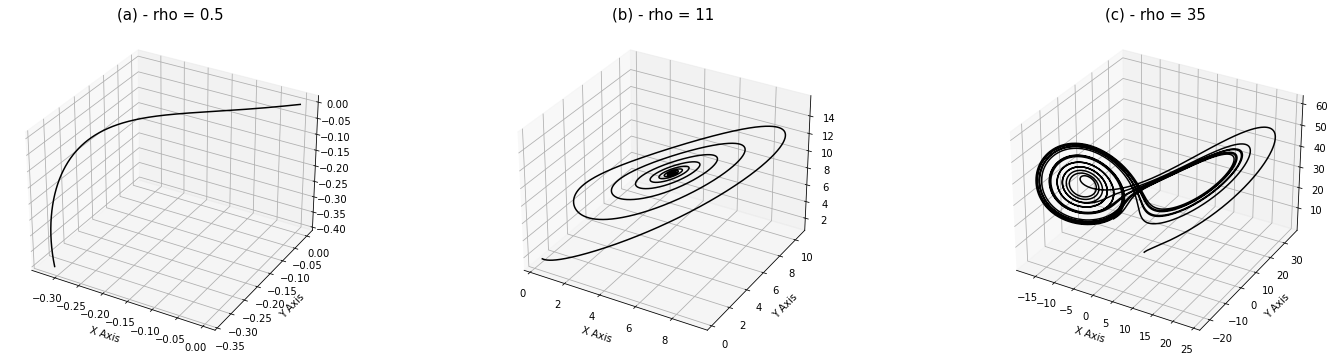

In [10]:
fig = plt.figure(figsize = (25,6))
timevec = np.arange(0,15,1/sample_rate)
num_steps = len(timevec)
r_list = [0.5,11,35]
alph = ['a' , 'b' , 'c']
for j in range(len(r_list)):
    xs = np.empty(num_steps)
    ys = np.empty(num_steps)
    zs = np.empty(num_steps)
    xs[0], ys[0], zs[0] = np.random.randn(3)       
    for i in range(num_steps-1):
        x_dot, y_dot, z_dot = lorenz(xs[i], ys[i], zs[i] , r = r_list[j])
        xs[i + 1] = xs[i] + (x_dot * dt)
        ys[i + 1] = ys[i] + (y_dot * dt)
        zs[i + 1] = zs[i] + (z_dot * dt)
    plt.subplot(1,3,j+1, projection='3d')
    plt.plot(xs,ys,zs,c='black' , label = 'Z Axis')
    plt.xlabel('X Axis')
    plt.title('({1}) - rho = {0}'.format(r_list[j] , alph[j]) , fontsize = 15)
    plt.ylabel('Y Axis')
plt.savefig('Figure1.png')